# Graph centrality analysis applied to the 1776 Boston rebelion
this project was inspired from https://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/
and https://www.youtube.com/watch?v=qOVz_dVbTrE&index=26&list=PLlWzRW5RWfEX-HeTjCDWTRCOhISKrPAep, thank you for sharing your knowledge with the internet !
The main object of this project is to use graph analysis to classify the influence of the people that participated in the rebelion based on their membership in some organizations.

In [88]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df=pd.read_csv('PaulRevereAppD.csv')
df.head(5)

,Unnamed: 0,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
0,Adams.John,0,0,1,1,0,0,0
1,Adams.Samuel,0,0,1,1,0,1,1
2,Allen.Dr,0,0,1,0,0,0,0
3,Appleton.Nathaniel,0,0,1,0,0,1,0
4,Ash.Gilbert,1,0,0,0,0,0,0


In [90]:
#we slice the dataframe
name_per_group=df.loc[:,"StAndrewsLodge":]
#transpose matrix
group_per_name=df.loc[:,"StAndrewsLodge":].T
print('name per group shape :',name_per_group.shape)
print('group per name shape :',group_per_name.shape)

name per group shape : (254, 7)
group per name shape : (7, 254)


In [91]:
#now to get the relationships between the persons we are going to operate the dot product between the two matrixes
people_adj=name_per_group.dot(group_per_name)

In [92]:
#we create the adjencecy matrix
#(i,j) : number of commun group the i person has with the j person
people_adj.head
#we want to get the name of all the people to label the nodes of the graph
name_of_people=df.loc[:,'Unnamed: 0']


In [93]:
graph=nx.from_numpy_matrix(people_adj.values)
graph=nx.relabel_nodes(graph,dict(enumerate(name_of_people)))

C:\Users\bbbbb\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


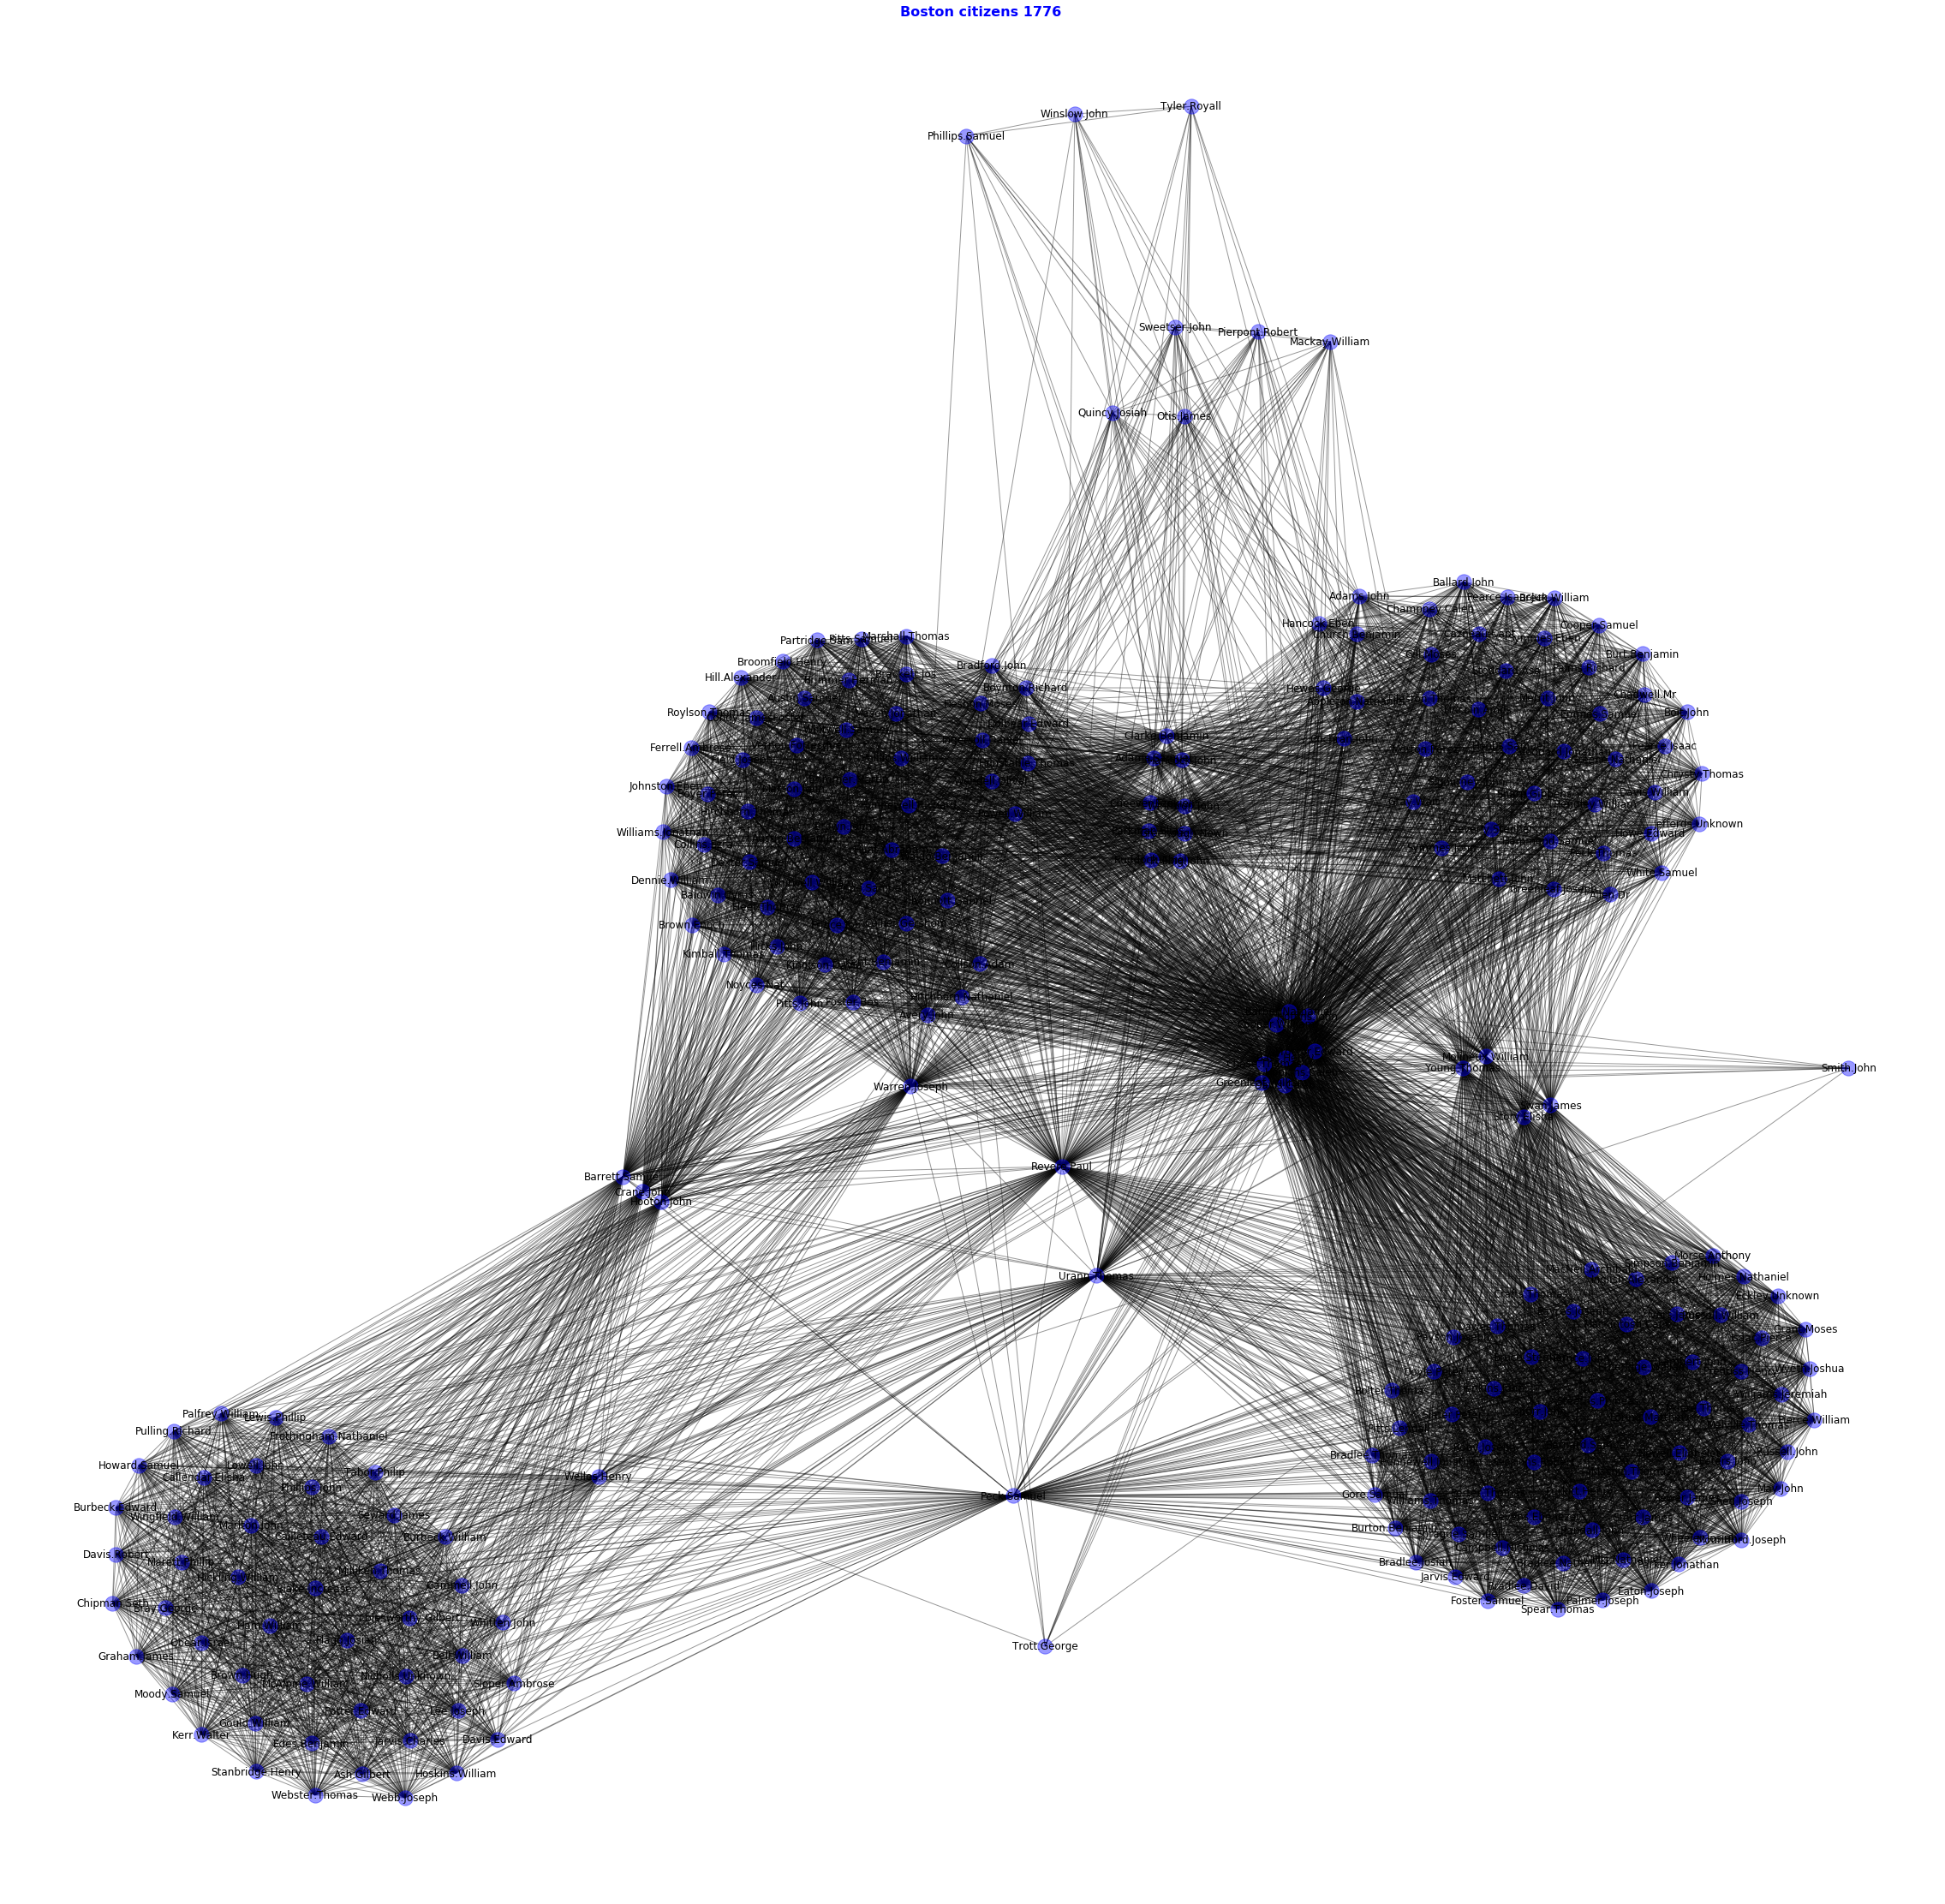

In [94]:
#let's plot the boston citizens 
plt.figure(figsize=(40,40))
pos=nx.spring_layout(graph,iterations=500,scale=5,k=.3)
nx.draw_networkx_labels(graph,pos,fontsize=8)
font={'fontname' :'Helvetica',
      'color': 'b',
      'fontweight':'bold',
      'fontsize':16
     }
plt.title('Boston citizens 1776',font)

nx.draw_networkx_nodes(graph,pos,node_color='b',alpha=.4)
nx.draw_networkx_edges(graph,pos,alpha=.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.savefig('people_graph.png')
plt.show()

In [95]:
#we can see that there are mainly 4 clics and the people tying them are the most likely to make troubles 
#lets mesure the centrality of each node in the graph
centrality=nx.eigenvector_centrality(graph)

In [96]:
#centrality is a dictionary of each node and its centrality
#lets make a list of tuples (node,centrality) out of this dictionnary to be able to sort it 
person_list=[]
#we add each tupple (node,measure_centrality) in the centrality dict to the person_list
for node in centrality:
    person_list.append((node,centrality[node]))

#we use the sorted method to sort the tupple on its centrality key and reverse to sort it from the most dangerous 
#person (having the maximum of connexion in the graph) to the 
sorted_person_list=sorted(person_list,key=lambda item:item[1],reverse=True)
print(sorted_person_list[0])

('Revere.Paul', 0.1448245471066474)


As we can see, Revere.Paul is a critical person in the graph and is likely to be one of the leaders of this rebelion...

In [97]:
#Lets now do the same analysis but using the organization x organization matrix
organization_adj=group_per_name.dot(name_per_group)
organization_adj

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
StAndrewsLodge,55,1,3,2,3,0,5
LoyalNine,1,11,5,0,5,0,8
NorthCaucus,3,5,69,8,15,11,20
LongRoomClub,2,0,8,13,1,5,5
TeaParty,3,5,15,1,83,5,10
BostonCommittee,0,0,11,5,5,24,14
LondonEnemies,5,8,20,5,10,14,79


### Comment of the article : 
"Again, interesting! (I beg to venture.) Instead of seeing how (and which) people are linked by their shared membership in organizations, we see which organizations are linked through the people that belong to them both. People are linked through the groups they belong to. Groups are linked through the people they share. This is the “duality of persons and groups” in the title of Mr Breiger’s article."

C:\Users\bbbbb\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<function matplotlib.pyplot.show>

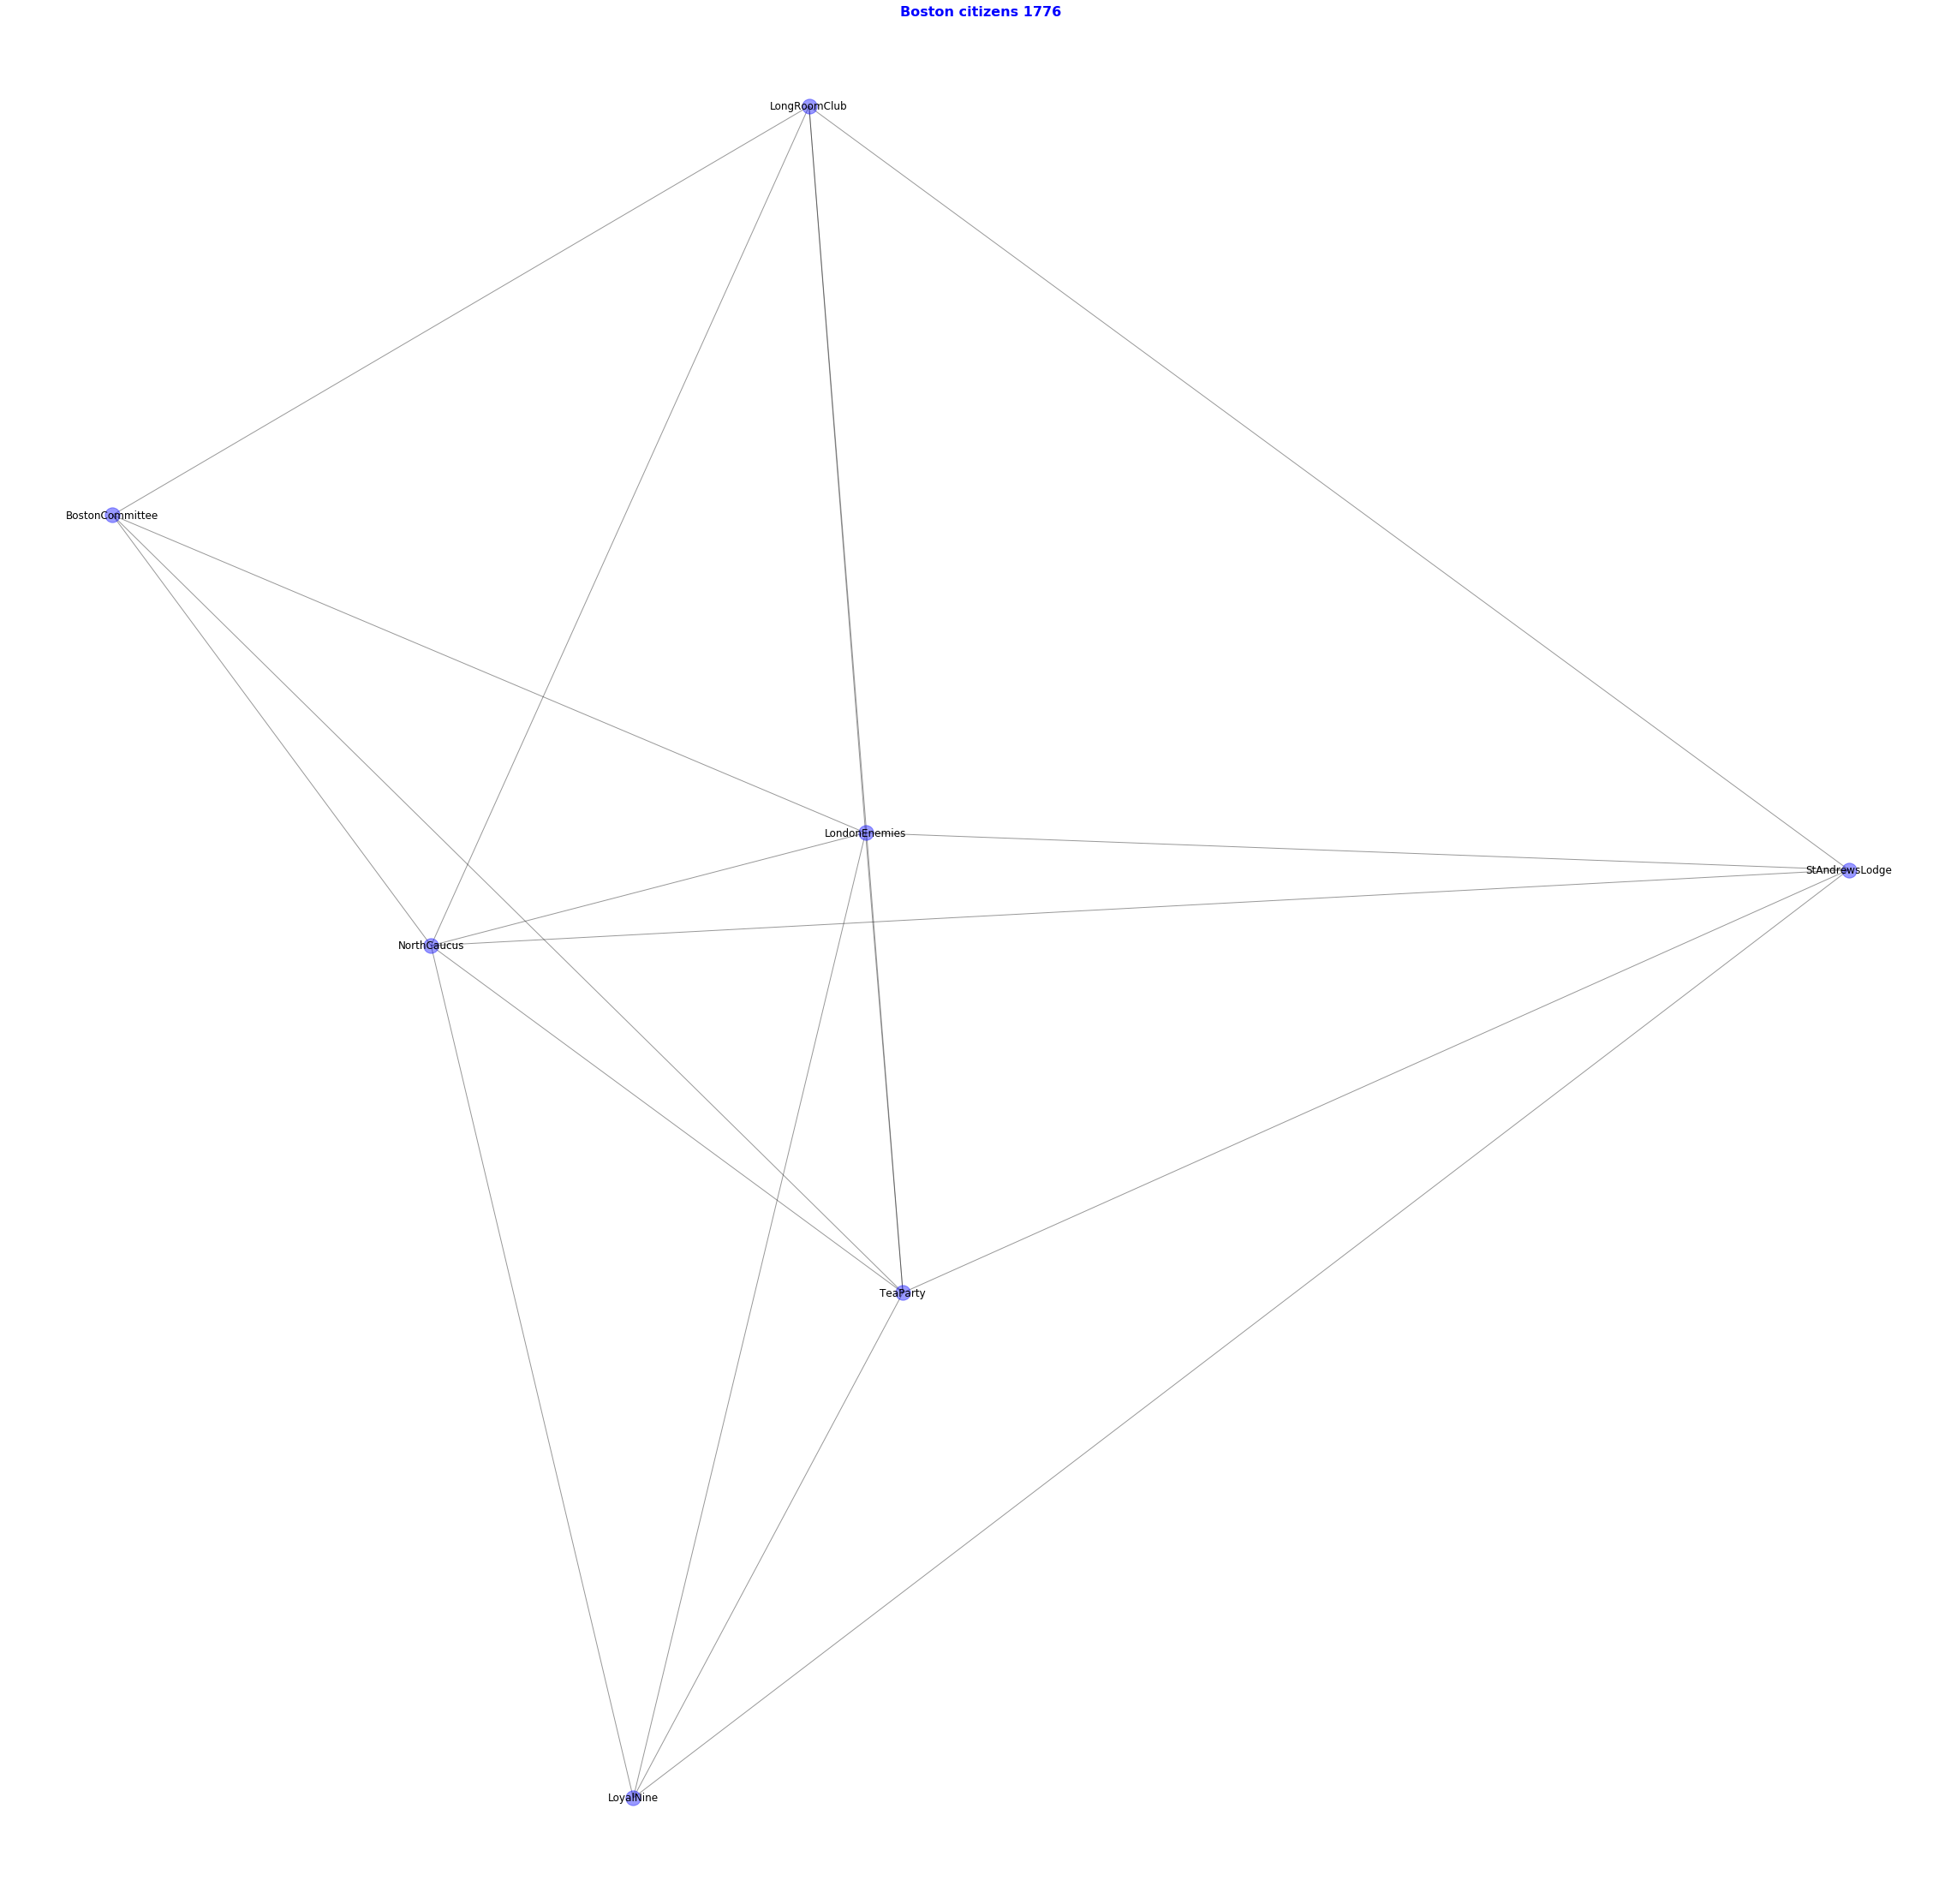

In [98]:
graph=nx.from_numpy_matrix(organization_adj.values)
graph=nx.relabel_nodes(graph,dict(enumerate(organization_adj.columns)))

#let's plot the boston citizens 
plt.figure(figsize=(40,40))
pos=nx.spring_layout(graph,iterations=500,scale=5,k=.3)
nx.draw_networkx_labels(graph,pos,fontsize=8)
font={'fontname' :'Helvetica',
      'color': 'b',
      'fontweight':'bold',
      'fontsize':16
     }
plt.title('Boston citizens 1776',font)

nx.draw_networkx_nodes(graph,pos,node_color='b',alpha=.4)
nx.draw_networkx_edges(graph,pos,alpha=.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.savefig('graph_organizations.png')
plt.show